# Intro to 4D-STEM data: visualization and analysis with py4DSTEM



### Acknowledgements

This tutorial was created by the py4DSTEM instructor team:
- Ben Savitzky (bhsavitzky@lbl.gov)
- Steve Zeltmann (steven.zeltmann@berkeley.edu)
- Stephanie Ribet (sribet@u.northwestern.edu)
- Alex Rakowski (arakowski@lbl.gov)
- Colin Ophus (clophus@lbl.gov)


Last updated:
- Jul 2023 July 17, v0.14.2

## Set up the environment

In [1]:
# Initialization - import the needed packages.
# For this tutorial, we will need py4DSTEM:
import py4DSTEM

# This line displays the current version of py4DSTEM:
py4DSTEM.__version__

'0.14.3'

---
# Download the tutorial data <a class="anchor" id="part_00"></a>

You can download the tutorial dataset here: (501 megabytes)
* [Simulated single crystal and polycrystalline gold](https://drive.google.com/file/d/1BJ_1qWFlbaJuOlKe7TapLFbEbQ0S600U/view?usp=drive_link)

# Load data

In [2]:
# Set the filepath

# dirpath = "/Users/Ben/work/data/py4DSTEM_sampleData/calibration_simulatedAuNanoplatelet/"
dirpath = "/media/cophus/DataSSD1/4DSTEM/tutorials/"
filepath_data = dirpath + "calibrationData_simulatedAuNanoplatelet_binned_v14.h5"

In [3]:
# Examine the file contents

py4DSTEM.print_h5_tree( filepath_data )

/
|---4DSTEM_simulation
    |---4DSTEM_AuNanoplatelet
    |---4DSTEM_polyAu
    |---defocused_CBED
    |---vacuum_probe




The file we opened holds multiple pieces of data.  If we don't specify which data we want, the `read` function will load all of it.  To load only some of the data, we can specify a path within the file to the data we want.  For now, we only want the 4D-STEM scan of polycrystalline gold, so we'll specify that with the `datapath` argument.

In [4]:
# Load data

datacube = py4DSTEM.read(
    filepath = filepath_data,
    datapath = '4DSTEM_simulation/4DSTEM_polyAu'
)

What we just did was load data into computer memory and save it as the variable `datacube`.
Let's take a look at that variable by just passing it directly to the Python interpreter:

In [5]:
datacube

DataCube( A 4-dimensional array of shape (100, 84, 125, 125) called '4DSTEM_polyAu',
          with dimensions:

              Rx = [0,1,2,...] pixels
              Ry = [0,1,2,...] pixels
              Qx = [0,1,2,...] pixels
              Qy = [0,1,2,...] pixels
)

#### What's in a DataCube?

This says that `datacube` is an object of type `DataCube`.  This is py4DSTEM's containter for 4D-STEM scans.  We see that it's four-dimensional, with a shape of `(100 x 84 x 125 x 125)`.

What does this mean?

- '**Real space**', or the plane of the sample, has a shape of (100,84), meaning the electron beam
was rastered over a 20x20 grid, and 

- '**Diffraction space**' or reciprocal space, or the plane of the detector, has a shape of (125,125),
meaning the scattered electron intensities are represented in a 125x125 grid.

In py4DSTEM we use 'R' for real space and 'Q' for diffraction space, hence the labels `Rx`, `Ry`, `Qx`, and `Qy` for the 4 dimensions.  Another common convention is to use 'K' for diffraction space.

Currently, we have provided no calibration or pixel sizes to this datacube, which is why the units are in `pixels` and start at `0` with a step of `1`.

In [6]:
# Here are a few more ways to look at a datacube's shape:

print(datacube.data.shape)
print(datacube.shape)
print(datacube.Rshape)
print(datacube.Qshape)

(100, 84, 125, 125)
(100, 84, 125, 125)
(100, 84)
(125, 125)


In [7]:
# The data itself lives in the `.data` attribute, and is a numpy array
# datacube.data

# Basic visualization

Evaluating data quality and deciding how to proceed with the analysis almost always begins with visualization. Here, we will go through some visualization functions py4DSTEM uses to visualize 4D data.

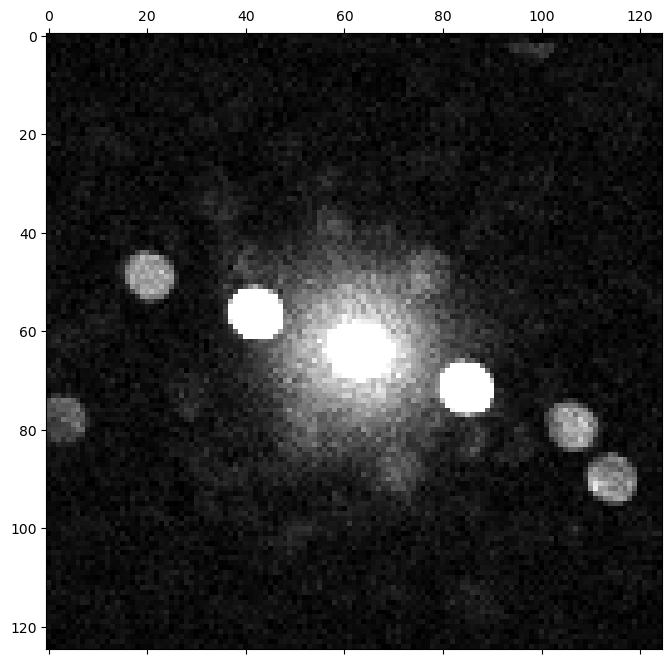

In [8]:
# Let's take a look at a single diffraction pattern.

# We can do that by "slicing" into the datacube, passing two integer indices
# representing the beam position (rx,ry) we want to look at.
# Here we picked position (10,30) arbitratily - you can change it to whatever you want.


dp = datacube.data[10,30]

py4DSTEM.show(dp)

In [9]:
# We're going to use the `show` function quite a bit, so lets make it easier on ourselve,
# and import that function into our global namespace, like this:

from py4DSTEM import show

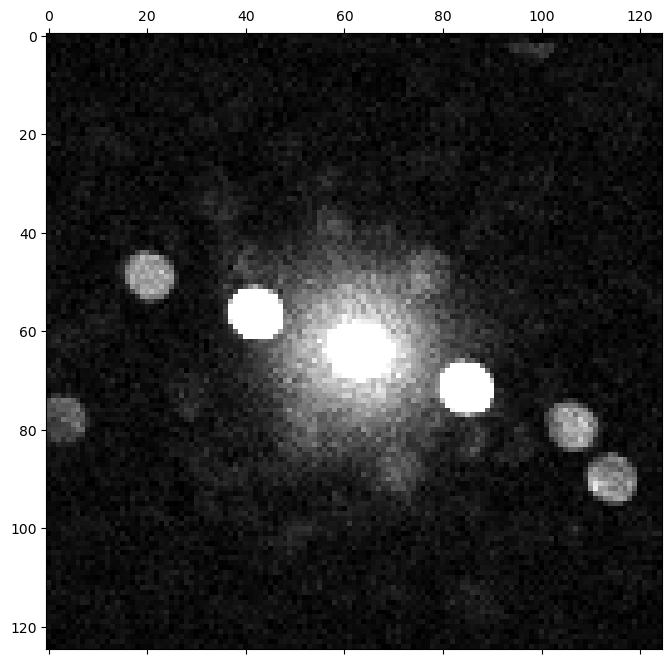

In [10]:
# Now we can do the same thing we just did a little more cleanly:

dp = datacube.data[10,30]

show(dp)

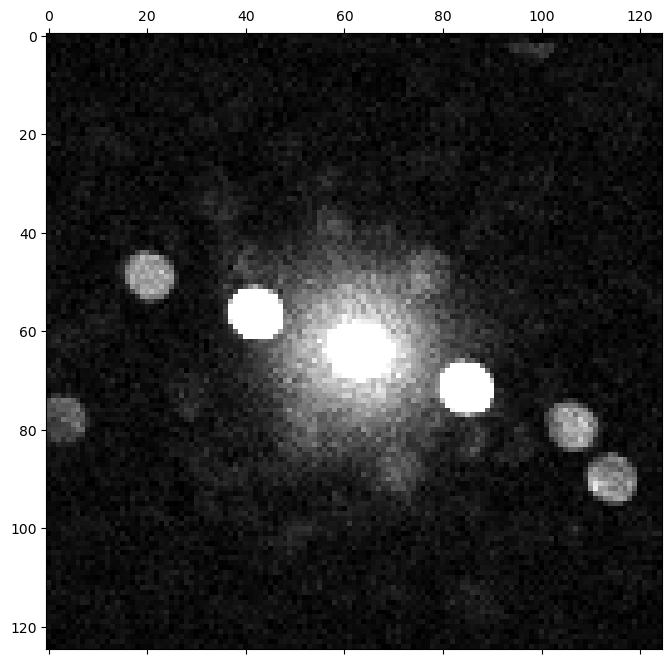

In [11]:
# We can even clean this up just a tiny bit more:
# instead of slicing into `datacube.data`, we can slice into `datacube` directly:

dp = datacube[10,30]

show(dp)

### Image scaling and contrast

py4DSTEM tries to automatically set the image contrast in a way that will show many of the image features.  However, it is often necessary to modify the scaling and contrast to see as many of the details in the image as possible.  We can do this by either using a nonlinear map of intensity --> color, or by adjust the color axis range (or both). We can modify these by adding some additional arguments to the `show()` function.

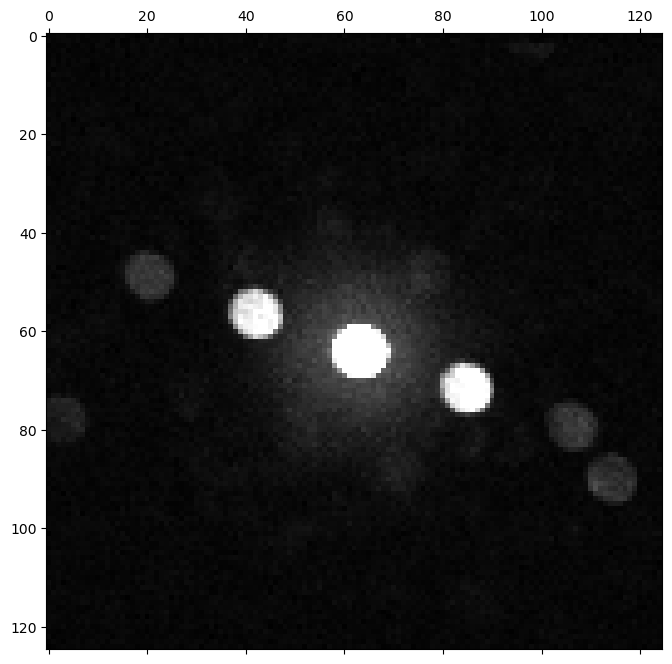

In [12]:
# Let's start by adjusting the color axis range, aka the contrast range.
# This means specifiying which pixel intensity values we set to black (min) and which we set to white (max).

# To tell py4DSTEM we want to manually specify the color range to range from 0 to 500, we use these arguments:


show(
    dp,
    intensity_range='absolute',
    vmin=20,
    vmax=500,
    # cmap='viridis',
)

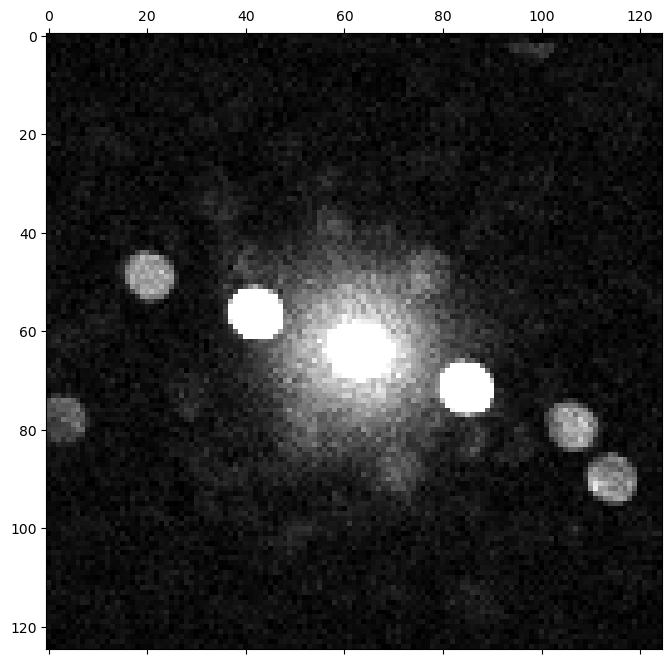

In [13]:
# We can also adjust the intensity range based on the fraction of distributed pixels. 
# The default (shown) is using this ordered method with a range of 0.02 - 0.98

show(
    dp,
    # intensity_range='ordered',
    # vmin=0,
    # vmax=1,
    # cmap='viridis',
)

We can see several diffracted Bragg disks, and the distribution of electrons scattered randomly to low angles (characteristic of amorphous samples, or a plasmon background).

However, we had to saturate the center Bragg disk in order to see the weak features. Can we see both strong and weak features?

Yes! We just need to use logarithmic or power law scaling of the image intensity.

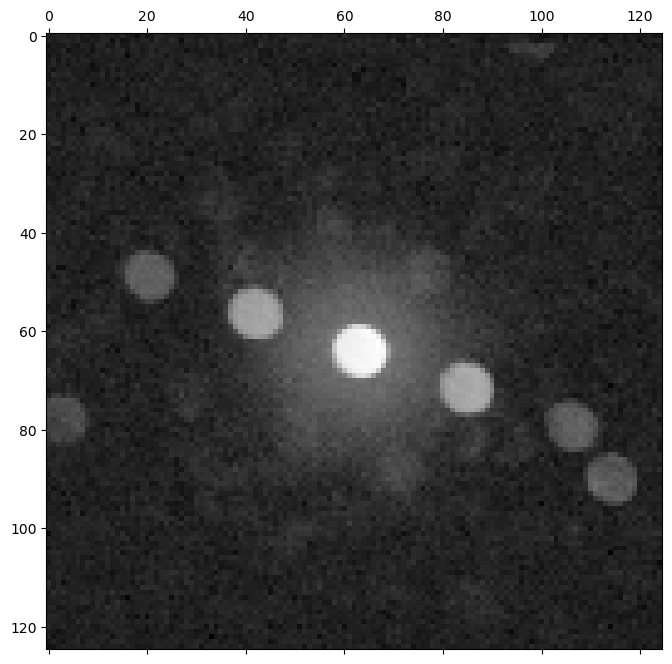

In [14]:
# The easiest thing to do is to logarithmic scaling

show(
    dp,
    scaling='log',
    vmin = 0, 
    vmax = 1,
)

Now we can appreciate the full range of features present in the data:

- the very bright center disk
- somewhat weaker crystalline Bragg diffracted spots
- a small number of electrons randomly scattered to low angles

We can manually specify the intensity range for logarithm scaling too:

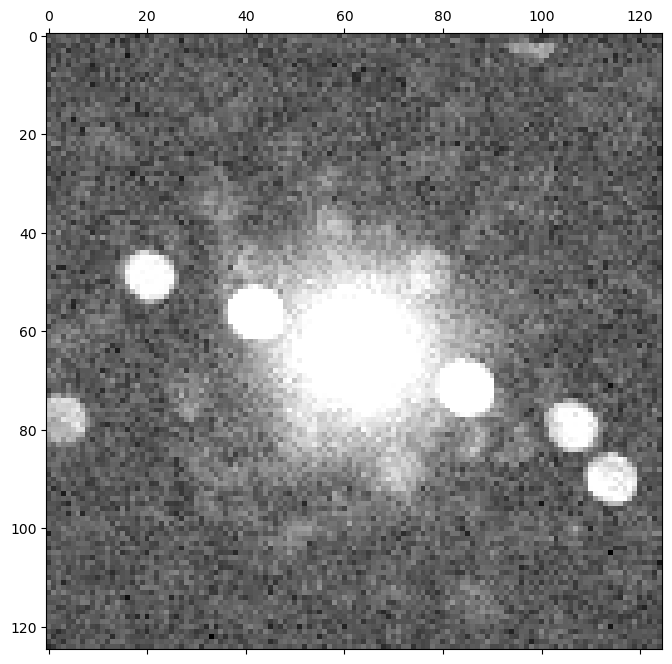

In [15]:
show(
    dp,
    scaling='log',
    vmin=0,
    vmax=0.95,
)

Logarithmic scaling is best when the features of interest have intensities which vary by multiple orders of magnitude.  It is often a good place to start if you're not sure what to expect in a dataset.

Scaling by a power law is sometimes more useful for visualization of diffraction patterns, because we can tune the power (each pixel intensity --> intensity^power) to achieve the desired scaling.  This may exclude some features - and this may be desireable, for instance when extremely weak features are present which are not scientifically interesting or large enough to affect our analysis and which we don't really need to examine closely, such as detector dark current.

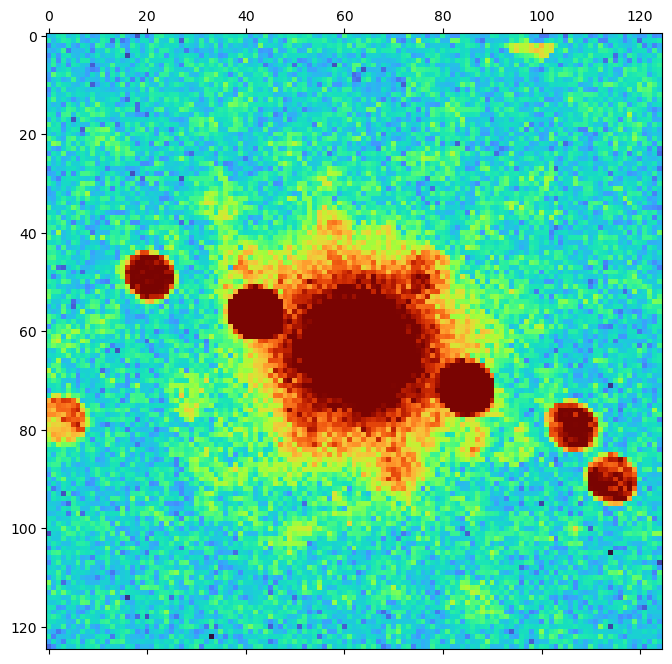

In [16]:
# Power law scaling using the cube root.

# We also introduce another keyword here - `cmap`, which specifies the colorscale used to map pixel intensities.
# matplotlib, Python's core visualization library, supports a huge number of built-in colormaps
# (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

show(
    dp,
    scaling='power',
    power=0.25,
    vmin=0,
    vmax=0.95,
    cmap='turbo',
)

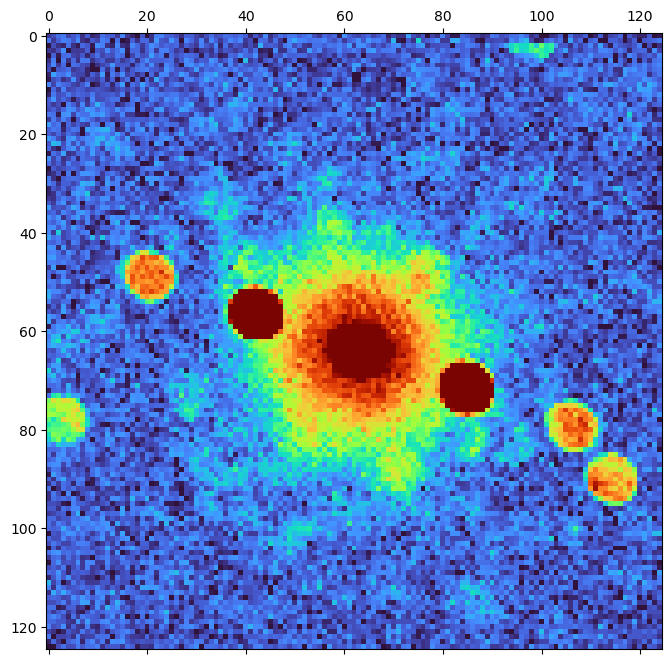

In [17]:
# Power law scaling using the quarter root:

show(
    dp,
    scaling='power',
    power=0.25,
    cmap='turbo',
)

### Mean and maximum diffraction patterns

The above examples look at a single diffraction pattern. Real experiments might consist of thousands or even millions of diffraction patterns. We want to evaluate the contents of the dataset as quickly as possible - is it single crystal? Polycrstalline? Amorphous? A mixture? 

To answer these questions efficiently, it's helpful to get an overview of all of the diffraction that occured in this data acquisition, all at once.  The simplest way to do this is to calculate the mean diffraction pattern.

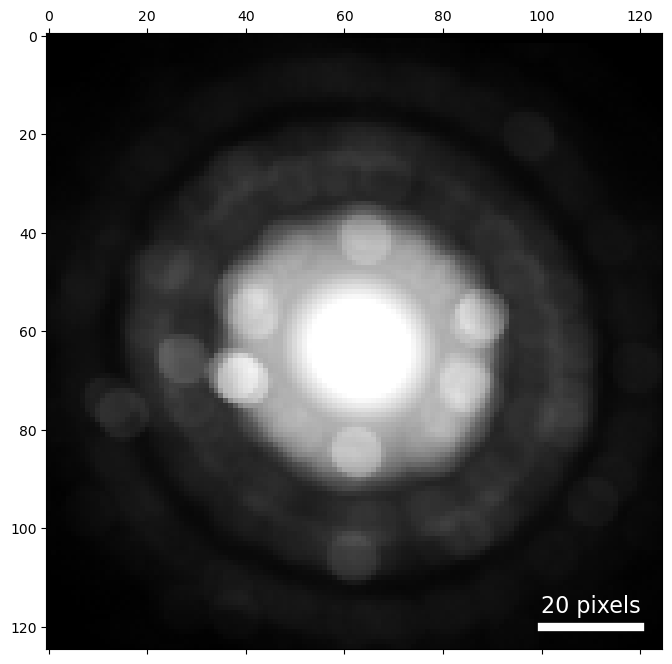

In [18]:
# Mean diffraction pattern

# compute
dp_mean = datacube.get_dp_mean()

# show
show(
    dp_mean,
    scaling='log',
)

In [19]:
# The mean diffraction pattern we calculated is stored in a native py4DSTEM datatype -
# in this case, the VirtualDiffraction class.

dp_mean

VirtualDiffraction( A 2-dimensional array of shape (125, 125) called 'dp_mean',
                    with dimensions:

                        dim0 = [0,1,2,...] pixels
                        dim1 = [0,1,2,...] pixels
)

In [20]:
# The data itself is just a numpy array

dp_mean.data

array([[33.19880952, 33.2647619 , 33.17714286, ..., 32.11107143,
        31.93238095, 32.04047619],
       [33.18404762, 33.25690476, 33.27964286, ..., 32.08547619,
        32.12119048, 32.1022619 ],
       [33.2497619 , 33.31821429, 33.35535714, ..., 32.97535714,
        32.92845238, 32.96880952],
       ...,
       [33.00154762, 33.20952381, 33.22166667, ..., 33.61547619,
        33.51166667, 33.32261905],
       [32.96488095, 33.1527381 , 33.12892857, ..., 33.46559524,
        33.3802381 , 33.45464286],
       [32.88392857, 33.15678571, 33.1697619 , ..., 33.51297619,
        33.40535714, 33.43166667]])

In [21]:
# We also don't need to save the output of `datacube.get_dp_mean()` to a variable if we don't want to -
# datacube methods with a computed output will typically store that output automatically.  This is accomplished
# using the datacube's tree, a filetree-like structure for data storage during program runtime:

datacube.tree()

/
|---dp_mean


In [22]:
# We can access the mean diffraction pattern using it's name:

datacube.tree( 'dp_mean' )

VirtualDiffraction( A 2-dimensional array of shape (125, 125) called 'dp_mean',
                    with dimensions:

                        dim0 = [0,1,2,...] pixels
                        dim1 = [0,1,2,...] pixels
)

In [23]:
datacube.tree( 'dp_mean' ) is dp_mean

True

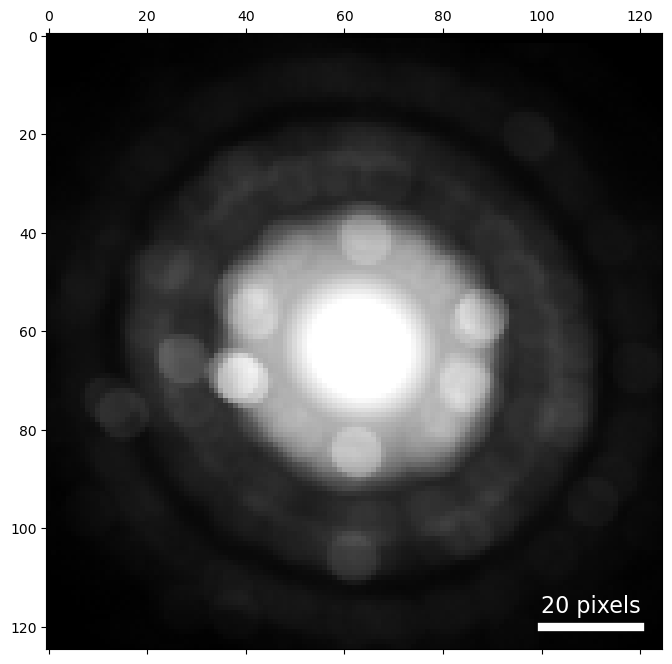

In [24]:
show(
    datacube.tree( 'dp_mean' ),
    scaling='log'
)

We see some interesting features, such as the rings of intensity containing some Bragg disks.  However calculating the mean is good and bad: it gives us a quick overview of the most prominent features in many patterns, but it may hide diffraction features which occur in a small number of scan positions.

For this reason, we typically also visualize the **maximum** diffraction pattern. By this, we mean the maximum signal of each pixel in diffraction space over all probe positons.  This way, we see the brightest scattering from each pixel, even if it only occured in one diffraction image.  This is a great way to see all of the Bragg scattering.

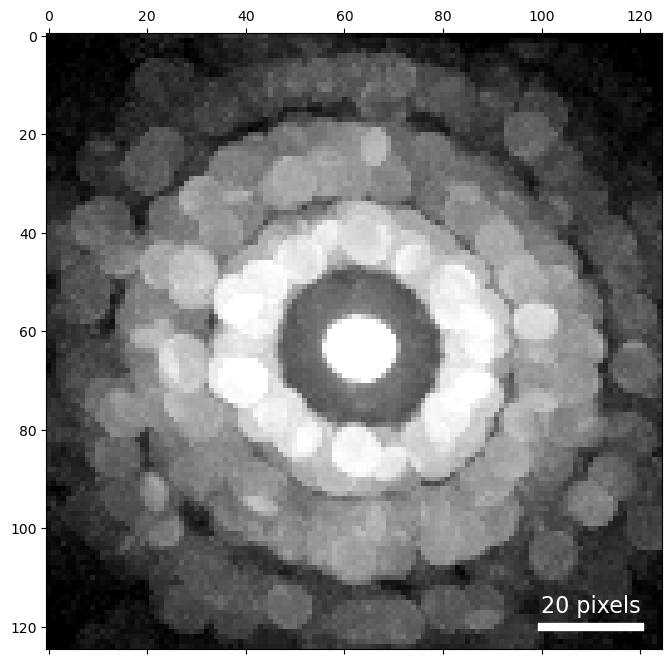

In [25]:
# Maximum diffraction pattern

# compute
dp_max = datacube.get_dp_max()

# show
show(
    dp_max,
    scaling='log'
)

Now we have a good idea of the contents of this 100 x 84 position dataset - various randomly oriented grains with lots of strong Bragg diffraction.

# Virtual imaging

Next, let's visualize this data in real space using virtual detectors. We'll generate a virtual bright field (BF) and virtual dark field (DF) image.

## Bright field

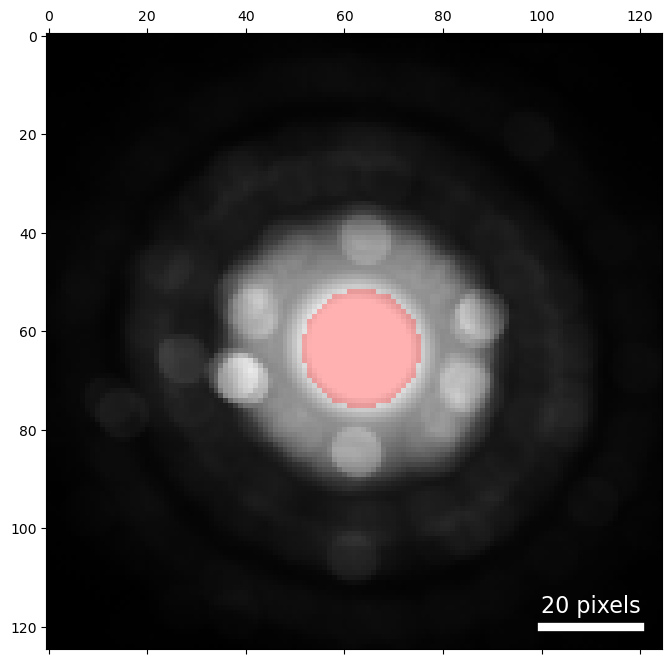

In [26]:
# Position the detector


# set the geometry by hand
center = (63.5,63.5)
radius = 12


# overlay selected detector position over mean dp
datacube.position_detector(
    mode = 'circle',
    geometry = (
        center,
        radius
    )
)

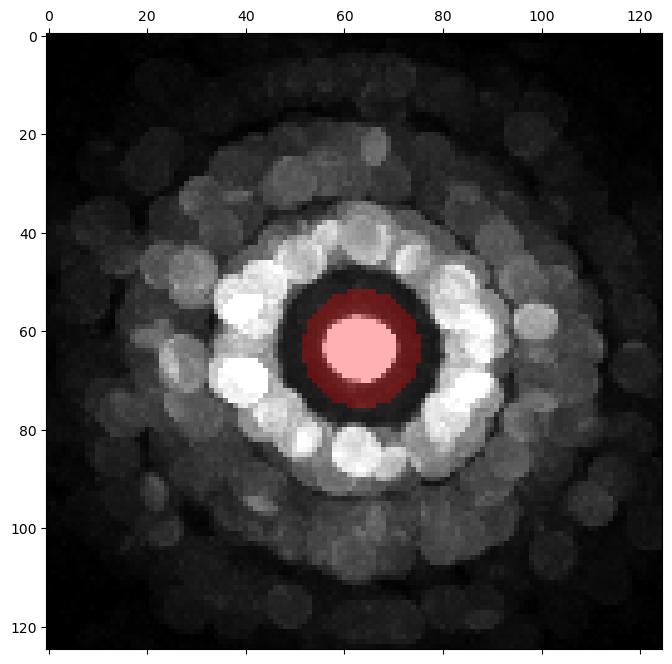

In [27]:
# By default, the `position_detector` method overlays the selected detector over the mean
# diffraction pattern, if we've calculated it.  If we want to use some other image for
# the overlay, like the maximum diffraction or a specific scan position, we can do that too:


datacube.position_detector(
     data = dp_max,
#     data = datacube[10,30],
    mode = 'circle',
    geometry = (
        center,
        radius
    ),
)

100%|███████████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 48988.66it/s]


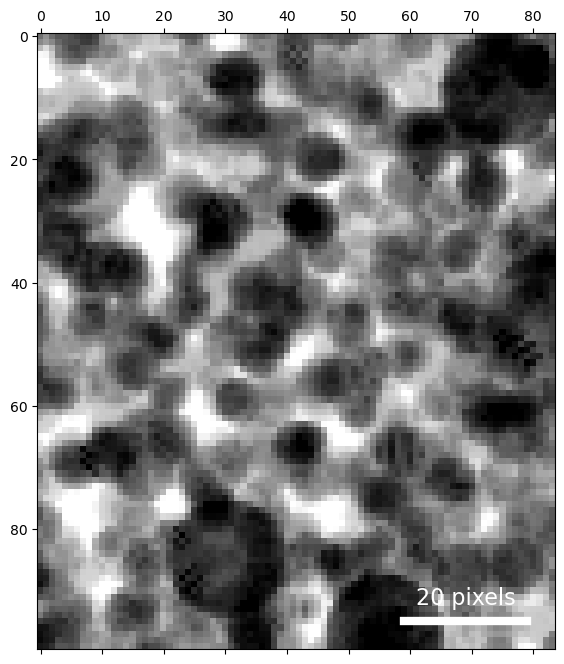

In [28]:
# Capture the virtual BF


# compute
datacube.get_virtual_image(
    mode = 'circle',
    geometry = (center,radius),
    name = 'bright_field',       # the output will be stored in `datacube`'s tree with this name
)

# show
show( datacube.tree('bright_field') )

## Set detector geometry programmatically

Instead of determining the center and radius by hand, we can do so programmatically by determining the position and radius of the center beam.

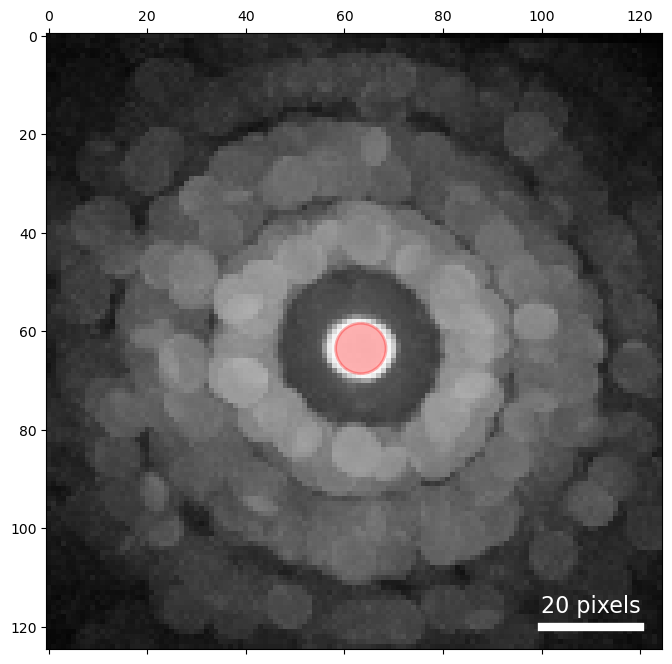

Estimated probe radius = 5.12 pixels


In [29]:
# Find the center and probe radius


# Get the probe position and size
probe_semiangle, probe_qx0, probe_qy0 = datacube.get_probe_size(
    dp_mean.data,
)

# Overlay the computed probe over the maximum diffraction pattern
show(
    dp_max, 
    scaling='log',
    vmin = 0,
    vmax = 1,
    circle = {
      'center':(probe_qx0, probe_qy0),
      'R': probe_semiangle,
      'alpha':0.3,
      'fill':True
    }
)

# Print the estimated probe radius
print('Estimated probe radius =', '%.2f' % probe_semiangle, 'pixels')

The estimated probe size is slightly too small for our bright-field detector, because of the diffraction shift of this pattern. To compute a bright field image, this radius can be expanded slightly to capture the central disk in all the diffraction images.

### Annular dark-field imaging

For our bright-field image we set the geometry manually.  This time, let's use the center and probe size from above.

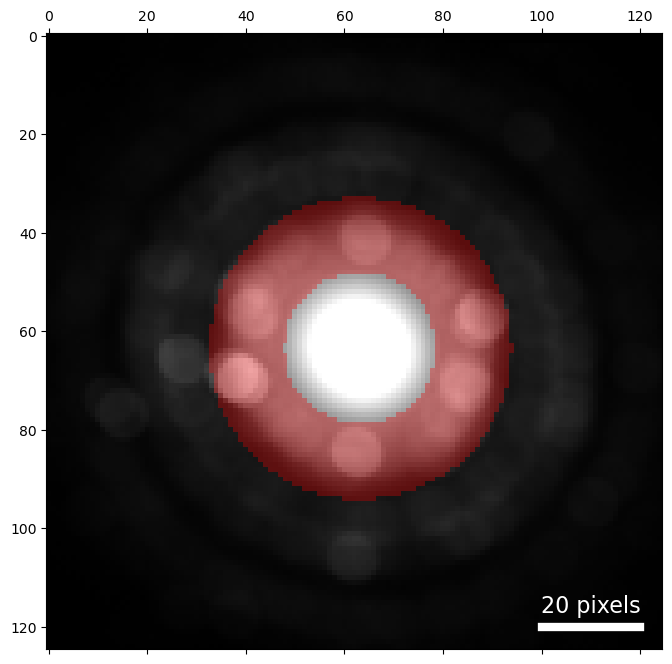

In [30]:
# Position the detector


# set the geometry
center = probe_qx0, probe_qy0
r_inner = probe_semiangle * 3
r_outer = probe_semiangle * 6
radii = r_inner,r_outer

# overlay selected detector position over mean dp
datacube.position_detector(
    mode = 'annular',
    geometry = (
        center,
        radii
    )
)

100%|███████████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 53324.04it/s]


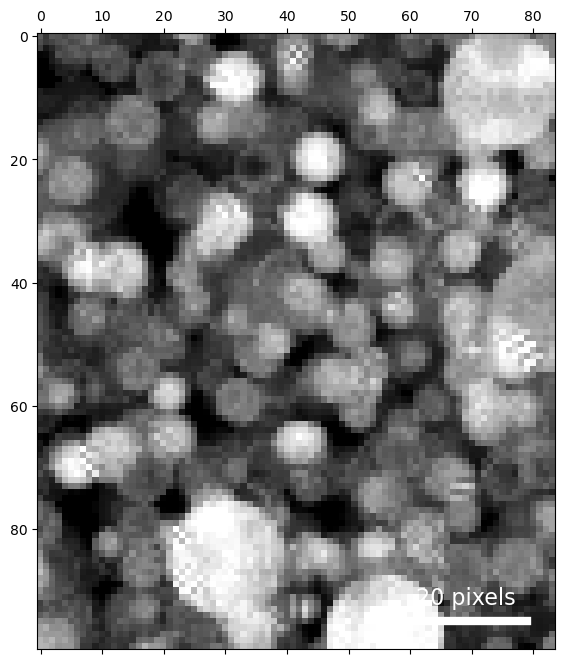

In [31]:
# Capture the virtual ADF

# compute
datacube.get_virtual_image(
    mode = 'annulus',
    geometry = (center,radii),
    name = 'annular_dark_field'
)

# show
show(datacube.tree('annular_dark_field'))

### Off axis dark-field imaging

In traditional TEM dark-field imaging, the sample is illuminated with a parallel beam, and an aperture is placed in the diffraction plane around a point of interest, creating pattern in the image plane resulting from electrons scattered only through those areas of diffraction space.  We can create an analogous virtual image by placing a circular detector in an off-axis position in diffraction space.

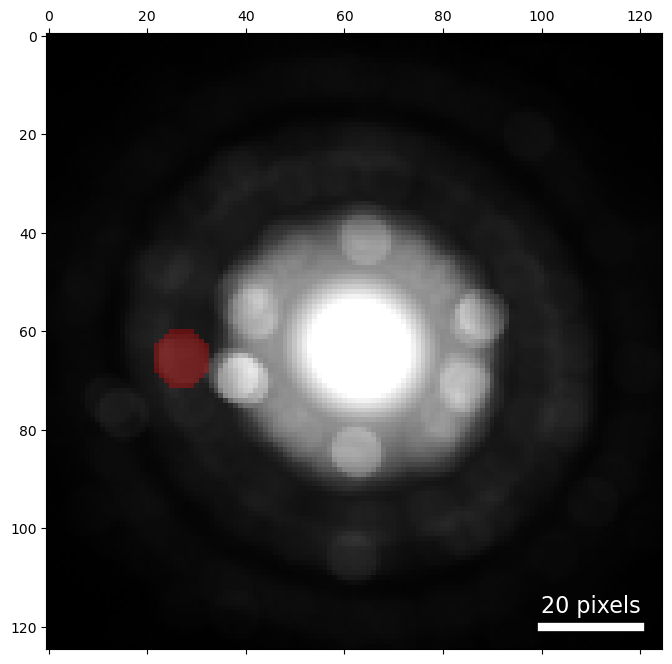

In [32]:
# Position detector


qx0_DF,qy0_DF = 65.5,27
#qx0_DF,qy0_DF = 84,62.5
r_DF = 6

geometry = (
    (qx0_DF,qy0_DF),
    r_DF
)

datacube.position_detector(
    mode = 'circular',
    geometry = geometry
)

100%|███████████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 47268.51it/s]


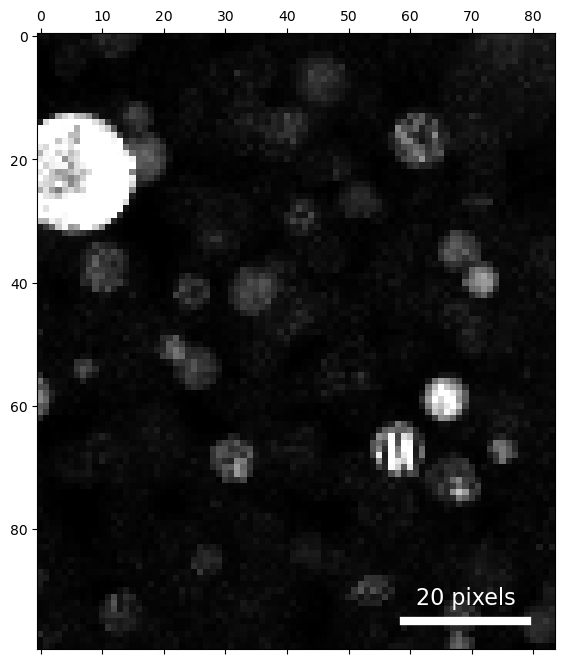

In [33]:
# Capture and display the off-axis DF image

datacube.get_virtual_image(
    mode = 'circle',
    geometry = geometry,
    name = 'virt_dark_field_01'
)
show(datacube.tree('virt_dark_field_01'))

# Virtual diffraction

We can also do the inverse - create an average diffraction pattern from some subset of scan positions, showing us what the scattering is like in just those positions in real space.

We've already done a little virtual diffraction - the mean and max diffraction patterns we computed at the beginning of this notebook.  In these cases we used all the data; below we'll compute similar patterns using only a selected subset of scan positions.

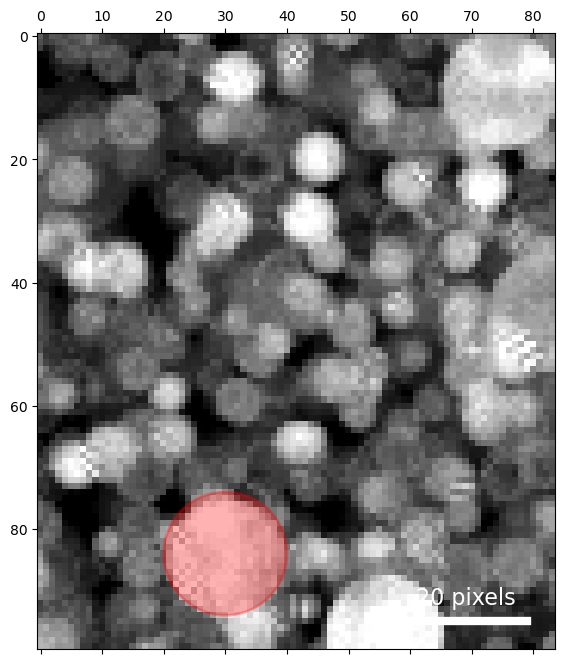

In [34]:
# Select a region of real space with a circular mask.
# Here, we'll try to look at one of the nanoparticles


# set geometry
mask_x0, mask_y0 = 84,30
mask_radius = 10


# plot the mask geometry, overlaid onto the dark field image we created earlier
py4DSTEM.visualize.show(
    datacube.tree('annular_dark_field'),
    circle = {
      'center':(mask_x0, mask_y0),
      'R': mask_radius,
      'alpha':0.3,
      'fill':True
    }
)

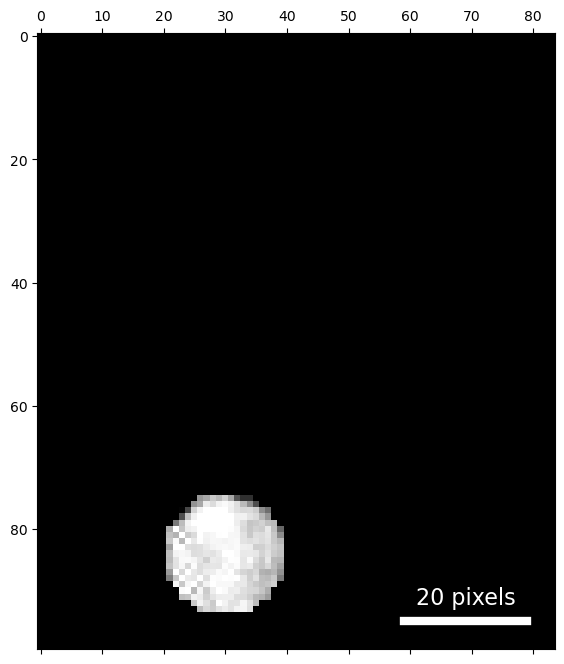

In [35]:
# The virtual diffraction method expects a real-space shaped boolean mask - that is, an array with
# values of True and False - to tell it which scan positions to use to make the virtual image.

# The code below makes a mask

import numpy as np
ryy,rxx = np.meshgrid(
    np.arange(datacube.R_Ny),
    np.arange(datacube.R_Nx),
)
rrr = np.hypot( rxx-mask_x0, ryy-mask_y0 )
mask = rrr < mask_radius

# show
show(
    datacube.tree('annular_dark_field'),
    mask = mask
)

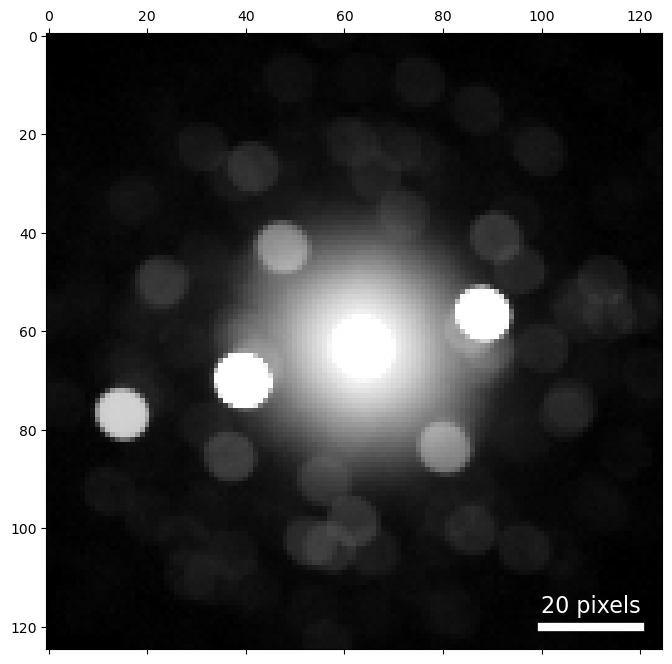

In [36]:
# Find the mean of the diffraction pattern in the specified region

selected_area_diffraction_01 = datacube.get_virtual_diffraction(
    method = 'mean',
    mask = mask,
    name = 'selected_area_diffraction_01'
)

# show
py4DSTEM.visualize.show(
    selected_area_diffraction_01,
    scaling='log',
)

We placed our mask over one Au nanoparticle, so that average diffraction pattern above shows us something about the orientation of this particle.  In a later tutorial, we'll see how to map the crystallographic orientations of all the particles in the dataset.

# Write and read

In [37]:
# set a filepath

dirpath

filepath_save = dirpath + 'analysis_basics_01.h5'
filepath_save

'/media/cophus/DataSSD1/4DSTEM/tutorials/analysis_basics_01.h5'

In [38]:
# inspect what's in `datacube`'s  tree - this is what we'll save!

datacube.tree()

/
|---dp_mean
|---dp_max
|---bright_field
|---annular_dark_field
|---virt_dark_field_01
|---selected_area_diffraction_01


In [39]:
# save

py4DSTEM.save(
    filepath_save,
    datacube,
    tree = None,  # this indicates saving everything *under* datacube, but not not datacube itself
    mode = 'o'    # this says that if a file of this name already exists, we'll overwrite it
)

In [40]:
# inspect the resulting HDF5 file

py4DSTEM.print_h5_tree(filepath_save)

/
|---4DSTEM_simulation
    |---annular_dark_field
    |---bright_field
    |---dp_max
    |---dp_mean
    |---selected_area_diffraction_01
    |---virt_dark_field_01




In [41]:
# check that it worked as expected - load everything:

d = py4DSTEM.read(filepath_save)

In [42]:
d.tree()

/
|---annular_dark_field
|---bright_field
|---dp_max
|---dp_mean
|---selected_area_diffraction_01
|---virt_dark_field_01


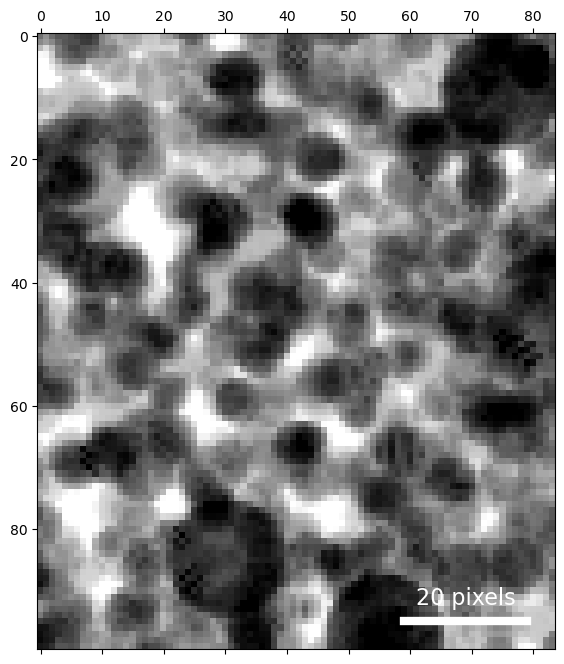

In [44]:
show(d.tree('bright_field'))